In [166]:
import trusspy as tp
import numpy as np
import pandas as pd
import random


In [167]:
data = pd.DataFrame(columns=("Fx","Fy","deformação_x","deformação_y"))

In [168]:
# init model
M = tp.Model()


 _____                  ______      
|_   _|                 | ___ \     
  | |_ __ _   _ ___ ___ | |_/ /   _ 
  | | '__| | | / __/ __||  __/ | | |
  | | |  | |_| \__ \__ \| |  | |_| |
  \_/_|   \__,_|___/___/\_|   \__, |
                               __/ |
                              |___/ 

TrussPy - Truss Solver for Python
          Version 1.0.3

Dutzler Andreas, Graz University of Technology, 2023
        

# Initialize Model
* loading Managers

    - finished.



In [169]:
class trelica:

    def __init__(self,fx,fy):
        self.fx = fx
        self.fy = fy
    def deformacao(self):

        element_type   = 1    # truss
        material_type  = 1    # linear-elastic

        L1 = 1
        L2 = 1
        L3 = 1

        E = 200*(10**9)

        area  = 10**-4

        F1 = self.fx
        F2 = self.fy
        F3 = 0

        with M.Nodes as MN:
            MN.add_node( 1, coord=(0,    0,  0))
            MN.add_node( 2, coord=(0,    0,  L1))
            MN.add_node( 3, coord=(L2,   0,  0))
            MN.add_node( 4, coord=(L2,   0,  L1))
            MN.add_node( 5, coord=(L2+L3,0,  0))



        with M.Elements as ME:
            ME.add_element( 1, conn=(1,3), gprop=[area] )
            ME.add_element( 2 ,conn=(1,4), gprop=[area] )
            ME.add_element( 3, conn=(2,3), gprop=[area] )
            ME.add_element( 4, conn=(2,4), gprop=[area] )
            ME.add_element( 5, conn=(3,4), gprop=[area] )
            ME.add_element( 6, conn=(3,5), gprop=[area] )
            ME.add_element( 7, conn=(4,5), gprop=[area] )

            ME.assign_etype(    'all',   element_type   )
            ME.assign_mtype(    'all',  material_type   )
            ME.assign_material( 'all', [E] )

        with M.Boundaries as MB:
            MB.add_bound_U( 1, (0,0,0) )
            MB.add_bound_U( 2, (0,0,0) )
            MB.add_bound_U( 3, (1,0,1) )
            MB.add_bound_U( 4, (1,0,1) )
            MB.add_bound_U( 5, (1,0,1) )

        with M.ExtForces as MF:
            MF.add_force( 5, (F1, F3, F2) )

        # M.Settings.dlpf = 1
        # M.Settings.du = 1

        M.Settings.incs = 1

        # M.Settings.stepcontrol = True
        # M.Settings.maxfac = 1

        # M.Settings.ftol = 10**8
        # M.Settings.xtol = 1
        # M.Settings.nfev = 1

        # M.Settings.dxtol = 1

        # build model and run job
        M.build()
        M.run()

        # M.plot_history(nodes=[5,5], X='Displacement X', Y='Displacement Z')

        # M.plot_model(config=['undeformed'],
        #                        view='xz', #'xy', 'yz', 'xz'
        #                        contour='force',
        #                     #    lim_scale=(-3,2,0,5,-1,4), #3d
        #                        lim_scale=1.4, #plane-view
        #                        force_scale=2.0, #5
        #                        inc=0)

        # M.plot_model(config=['deformed'],
        #                        view='xz',
        #                        contour='force',
        #                        lim_scale=1.3,
        #                        force_scale=500.0,
        #                        inc=-1)

        # M.plot_model(config=['deformed'],
        #                        view='xz',
        #                        contour='force',
        #                     #    lim_scale=(-3,2,0,5,-2,3),
        #                         lim_scale=1.3,
        #                        force_scale=500,
        #                        inc=-1)

In [ ]:
fx = random.randint(-10**5,10**5)
fy = random.randint(-10**5,10**5)
t = trelica(fx,fy)
a = t.deformacao()


# Model Summary
    Analysis Dimension      "ndim": 3
    Number of Nodes       "nnodes": 5
    Number of Elements    "nelems": 7
 
    System DOF              "ndof": 15
    active DOF             "ndof1": 6
    locked DOF             "ndof2": 9
 
    active DOF          "nproDOF1": [ 6  8  9 11 12 14]
    fixed  DOF          "nproDOF0": [ 0  1  2  3  4  5  7 10 13]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:------------------------------------|:--------|:--|
|Maximum increments                   |   `incs`| 1 |
|Maximum increment recycles           |   `cycl`| 4 |
|Maximum Newton-Rhapson iterations    |   `nfev`| 8 |
|Maximum incremental displacement     |     `du`| 0.02 |
|Maximum incremental LPF              |   `dlpf`| 0.02 |
|Initial control component            |     `j0`| LPF|
|Locked control component             |`j_fixed`| False |
|Maximum incremental overshoot        |  `dxtol`| 1.000001 |
|Tol

In [ ]:
data

,Fx,Fy,deformação_x,deformação_y
0,21390.0,-19377.0,-0.000007,-0.000141


In [ ]:
for i in range(0,1000):
    for i in range(1001):
        fx = random.randint(-10**5,10**5) # em Newtons
        fy = random.randint(-10**5,10**5) # em Newtons
    dado =trelica(fx, fy)
    deformacao = dado.deformacao()
    data.loc[len(data)] = row
    data.tail()
    

ValueError: operands could not be broadcast together with shapes (10,) (6,) 

In [ ]:
element_type   = 1    # truss
material_type  = 1    # linear-elastic

L1 = 1
L2 = 1
L3 = 1

In [ ]:
E = 200*(10**9)

area  = 10**-4

F1 = 0
F2 = -(10**5)
F3 = 0

In [ ]:
with M.Nodes as MN: # Nodes positions
    MN.add_node( 1, coord=(0,    0,  0))
    MN.add_node( 2, coord=(0,    0,  L1))
    MN.add_node( 3, coord=(L2,   0,  0))
    MN.add_node( 4, coord=(L2,   0,  L1))
    MN.add_node( 5, coord=(L2+L3,0,  0))



In [ ]:
with M.Elements as ME:
    ME.add_element( 1, conn=(1,3), gprop=[area] )
    ME.add_element( 2 ,conn=(1,4), gprop=[area] )
    ME.add_element( 3, conn=(2,3), gprop=[area] )
    ME.add_element( 4, conn=(2,4), gprop=[area] )
    ME.add_element( 5, conn=(3,4), gprop=[area] )
    ME.add_element( 6, conn=(3,5), gprop=[area] )
    ME.add_element( 7, conn=(4,5), gprop=[area] )

    ME.assign_etype(    'all',   element_type   ) #element_type   = 1  truss
    ME.assign_mtype(    'all',  material_type   ) #material_type  = 1  linear-elastic
    ME.assign_material( 'all', [E] ) # Função que define o módulo de Elasticidade das barras


In [ ]:
with M.Boundaries as MB:
    MB.add_bound_U( 1, (0,0,0) )
    MB.add_bound_U( 2, (0,0,0) )
    MB.add_bound_U( 3, (1,0,1) )
    MB.add_bound_U( 4, (1,0,1) )
    MB.add_bound_U( 5, (1,0,1) )


In [ ]:
with M.ExtForces as MF:
    MF.add_force( 5, (F1, F3, F2) )

In [ ]:
M.ExtForces.forces

array([[        0.,         0., -24300000.]])

In [ ]:
M.Settings.incs = 1

In [ ]:
M.build()
M.run()


# Model Summary
    Analysis Dimension      "ndim": 3
    Number of Nodes       "nnodes": 5
    Number of Elements    "nelems": 7
 
    System DOF              "ndof": 15
    active DOF             "ndof1": 6
    locked DOF             "ndof2": 9
 
    active DOF          "nproDOF1": [ 6  8  9 11 12 14]
    fixed  DOF          "nproDOF0": [ 0  1  2  3  4  5  7 10 13]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:------------------------------------|:--------|:--|
|Maximum increments                   |   `incs`| 1 |
|Maximum increment recycles           |   `cycl`| 4 |
|Maximum Newton-Rhapson iterations    |   `nfev`| 8 |
|Maximum incremental displacement     |     `du`| 0.02 |
|Maximum incremental LPF              |   `dlpf`| 0.02 |
|Initial control component            |     `j0`| LPF|
|Locked control component             |`j_fixed`| False |
|Maximum incremental overshoot        |  `dxtol`| 1.000001 |
|Tol

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Displacement Z', ylabel='Force Z'>)

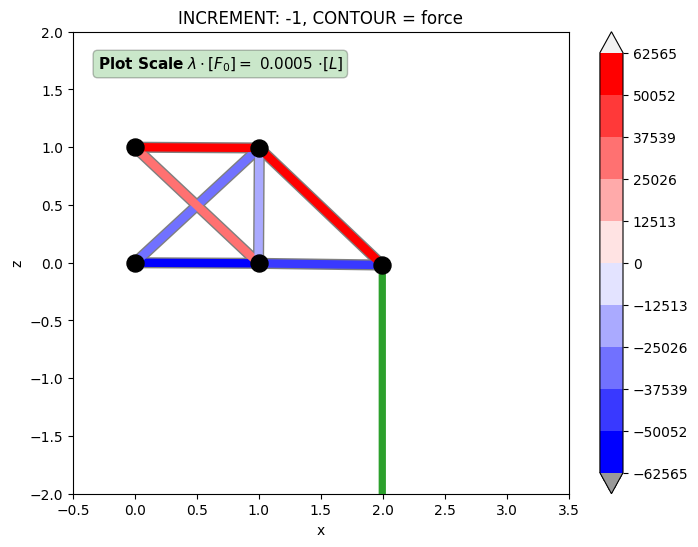

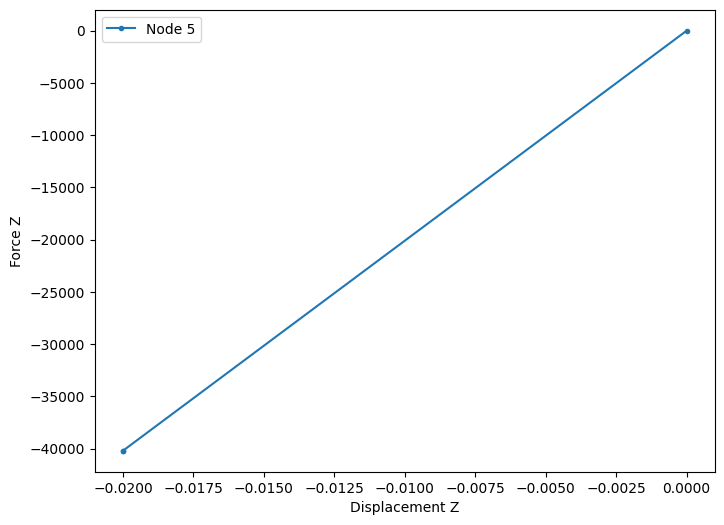

In [ ]:
M.plot_model(config=['deformed'],
             view='xz',
             contour='force',
             lim_scale=(-0.5,3.5,-2,2),
             force_scale=1/2000,
             inc=-1)

M.plot_history(nodes=[5,5], X='Displacement Z', Y='Force Z')

In [ ]:
# show results
M.plot_movie(config=['deformed'],
             view='xz',
             contour='force',
             lim_scale=(-0.5,3.5,-2,2),
             force_scale=5,
             cbar_limits=[-1,1])

M.Results.R[-1].U[-1]


array([-0.00499952,  0.        , -0.02      ])

In [ ]:
#y = deslocamento x, y, z
#x = força

#class trelica:
#    def __init__

#como criar um data frame
#como adicionar linhas em uma coluna
#como remover uma coluna
#como multiplicar uma coluna
# pd.get_dummies  (pra separar variáveis categóricas)





In [ ]:
data = pd.DataFrame()